### prédire la durée du trajet

In [2]:
import numpy as np
import pandas as pd

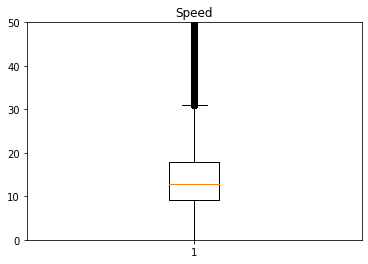

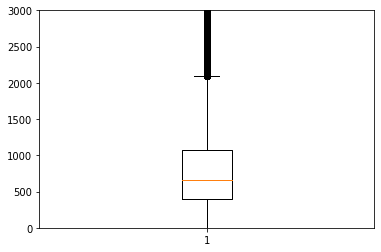

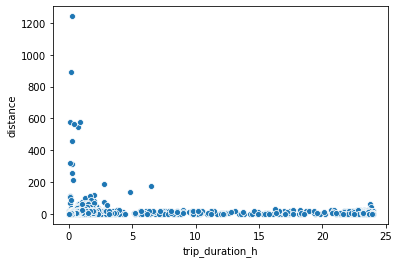

NameError: name 'df_taxi_clean' is not defined

In [1]:
%run Calcul_nettoye.ipynb

In [71]:
df_taxi.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,distance,trip_duration_h,vitesse_m_km_h,weekday_pickup,hour_pickup,hour_class
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,1.498991,0.126389,11.860150,0,17,"(15, 19]"
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,1.806074,0.184167,9.806736,6,0,"(-1, 3]"
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,6.387103,0.590000,10.825598,1,11,"(7, 11]"
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,1.485965,0.119167,12.469634,2,19,"(15, 19]"
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,1.188962,0.120833,9.839682,5,13,"(11, 15]"


In [5]:
df_taxi.shape

(1458629, 14)

In [2]:
df_taxi_clean = df_taxi.drop([df_taxi.index[355003] , df_taxi.index[680594], df_taxi.index[924150], df_taxi.index[978383]])

In [3]:
df_taxi_clean = df_taxi_clean[df_taxi_clean["distance"]<200]

In [8]:
df_taxi_clean.trip_duration.mean()

952.8145863398748

In [79]:
df_taxi_clean.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,distance,trip_duration_h,vitesse_m_km_h,weekday_pickup,hour_pickup,hour_class
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,1.498991,0.126389,11.860150,0,17,"(15, 19]"
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,1.806074,0.184167,9.806736,6,0,"(-1, 3]"
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,6.387103,0.590000,10.825598,1,11,"(7, 11]"
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,1.485965,0.119167,12.469634,2,19,"(15, 19]"
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,1.188962,0.120833,9.839682,5,13,"(11, 15]"


In [80]:
day_of_week_duration = df_taxi_clean.groupby("weekday_pickup")["trip_duration"].mean()
print(day_of_week_duration)

weekday_pickup
0     897.951013
1     962.907036
2     975.450662
3    1006.523015
4     990.223570
5     922.817811
6     901.639395
Name: trip_duration, dtype: float64


In [12]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

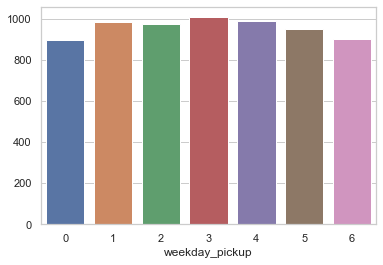

In [62]:
sns.set(style="whitegrid")

x=day_of_week_duration.index
y=day_of_week_duration.values
ax = sns.barplot(x=x, y=y, data=df_taxi_clean)

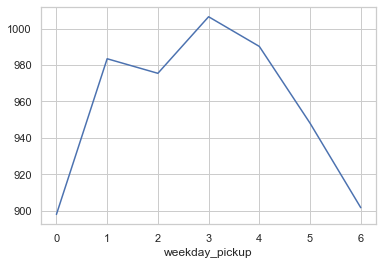

In [63]:
x=day_of_week_duration.index
y=day_of_week_duration.values
ax = sns.lineplot(x=x, y=y, data=df_taxi_clean)

In [64]:
hour_of_day_duration = df_taxi_clean.groupby("hour_pickup")["trip_duration"].mean()
print(hour_of_day_duration)

hour_pickup
0      936.657302
1      903.087112
2      890.076934
3      890.070878
4      921.976444
5      822.298960
6      797.434943
7      831.758345
8      924.559199
9      933.528915
10     933.367605
11     966.430282
12     993.533079
13    1032.225613
14    1075.789264
15    1118.836917
16    1080.115470
17    1030.581619
18     981.593353
19     894.354059
20     879.471845
21     890.515110
22    1023.455921
23     925.091409
Name: trip_duration, dtype: float64


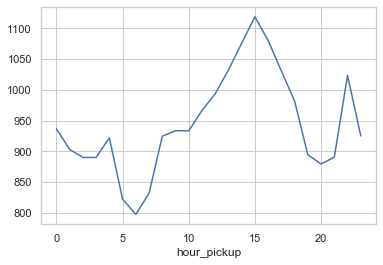

In [65]:
x=hour_of_day_duration.index
y=hour_of_day_duration.values
ax = sns.lineplot(x=x, y=y, data=df_taxi_clean)

(0, 20)

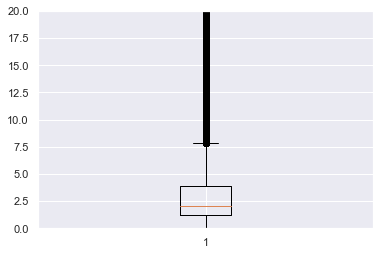

In [21]:
plt.boxplot([df_taxi_clean["distance"]])
plt.ylim(0,20)

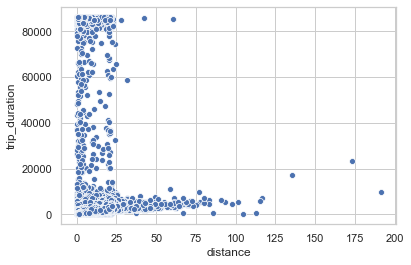

In [81]:
x=df_taxi_clean.distance
y=df_taxi_clean.trip_duration

sns.scatterplot(x=x, y=y, data=df_taxi_clean)

In [5]:
df_distance_moins_de_100 = df_taxi_clean[df_taxi_clean['distance']<3.75]

In [6]:
df_distance_moins_de_100_vitesse_moins_de_150 = df_distance_moins_de_100[df_distance_moins_de_100['vitesse_m_km_h']<150]

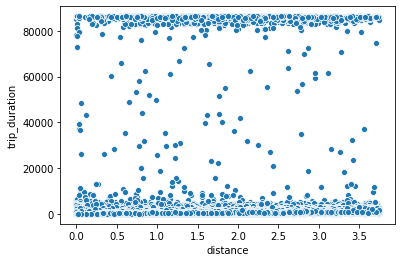

In [7]:
x=df_distance_moins_de_100.distance
y=df_distance_moins_de_100.trip_duration

ax = sns.scatterplot(x=x, y=y, data=df_distance_moins_de_100)

In [4]:
df_taxi_clean[df_taxi_clean['vitesse_m_km_h']>150]

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,distance,trip_duration_h,vitesse_m_km_h
1107,id0729156,2,2016-06-23 13:36:48,2016-06-23 13:36:50,3,-73.827660,40.716175,-73.822113,40.711452,N,2,0.703286,0.000556,1265.913957
13046,id3468323,1,2016-06-27 18:37:21,2016-06-27 18:43:16,1,-73.881195,40.882942,-73.965141,40.762486,N,355,15.147385,0.098611,153.607283
107171,id1656254,2,2016-01-18 00:35:38,2016-01-18 00:35:54,1,-73.805527,40.651360,-73.804230,40.661629,N,16,1.147469,0.004444,258.180457
125668,id0456393,1,2016-04-27 06:59:15,2016-04-27 07:03:40,1,-73.979668,40.748005,-73.865097,40.683315,N,265,12.044626,0.073611,163.625113
127613,id1322914,2,2016-03-25 17:21:18,2016-03-25 17:21:27,1,-73.801102,40.669941,-73.801392,40.673851,N,9,0.435603,0.002500,174.241210
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1359910,id3628988,1,2016-05-05 18:21:37,2016-05-05 18:30:45,1,-79.569733,41.586273,-80.355431,42.090183,N,548,85.911837,0.152222,564.384334
1370617,id2427976,2,2016-02-07 15:00:04,2016-02-07 15:00:11,1,-73.983749,40.755661,-73.981155,40.753223,N,7,0.348258,0.001944,179.104257
1390507,id3141426,2,2016-05-06 18:29:00,2016-05-06 18:29:05,1,-73.874718,40.730610,-73.867432,40.732868,N,5,0.663507,0.001389,477.724781
1398157,id2905190,2,2016-03-05 00:17:29,2016-03-05 00:17:32,1,-74.003487,40.732609,-74.004189,40.731274,N,3,0.159858,0.000833,191.829784


In [8]:
df_taxi_clean.groupby("distance")["trip_duration"].

In [10]:
df_taxi_clean.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,distance,trip_duration_h,vitesse_m_km_h
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,1.498991,0.126389,11.860150
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,1.806074,0.184167,9.806736
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,6.387103,0.590000,10.825598
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,1.485965,0.119167,12.469634
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,1.188962,0.120833,9.839682


## pour voir la corrélation, penser à faire sm.OLS et heatmap

### Sélection 1

In [82]:
'''x = df_taxi_clean[["vendor_id", "passenger_count", "pickup_longitude", "pickup_latitude", "weekday_pickup", "hour_pickup"]]
y = df_taxi_clean["trip_duration"]/60'''

### Sélection 2 

In [35]:
'''x = df_taxi_clean[["distance", "weekday_pickup", "hour_pickup"]] #normalement on pouvais pas savoir la distance en amont
y = df_taxi_clean["trip_duration"]/60'''

### Sélection 3

In [6]:
'''x = df_taxi_clean[["weekday_pickup", "hour_pickup"]]
y = df_taxi_clean["trip_duration"]/60'''

### Sélection 4

In [35]:
x = df_taxi_clean[["distance"]]
y = df_taxi_clean["trip_duration"]/60

### Partie prédiction

In [36]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [37]:
# séparer les données en train et test

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.3, random_state=22)

In [38]:
# 标准化（Z-Score）(X-mean)/std

In [39]:
transfer = StandardScaler()
x_train = transfer.fit_transform(x_train)
x_test = transfer.fit_transform(x_test)

### LinearRegression

In [40]:
estimator = LinearRegression()
ret = estimator.fit(x_train, y_train)

In [41]:
y_pre=estimator.predict(x_test)

In [42]:
y_pre_train_l_r = estimator.predict(x_train)

In [91]:
'''print(len(y_pre))'''

'print(len(y_pre))'

In [92]:
'''len(y_test)'''

'len(y_test)'

In [43]:
error=mean_squared_error(y_test, y_pre)
print(error)

2779.2231338405536


In [44]:
error_train=mean_squared_error(y_train, y_pre_train_l_r)
print(error_train)

2574.350264086437


In [95]:
'''error_r2=r2_score(y_test, y_pre)
print(error_r2)'''

'error_r2=r2_score(y_test, y_pre)\nprint(error_r2)'

In [48]:
'''y_test.sort_index()'''

1          0.184167
2          0.590000
3          0.119167
4          0.120833
5          0.123056
             ...   
1458638    0.115000
1458639    0.216111
1458640    0.181944
1458641    0.212222
1458643    0.055000
Name: trip_duration_h, Length: 1021051, dtype: float64

In [30]:
'''print(y_pre)'''

[0.26900541 0.27141111 0.27261395 ... 0.25945374 0.26866265 0.26873056]


In [31]:
'''taux_error = abs(y_pre-y_test.sort_index())/y_test.sort_index()*100'''

In [32]:
'''taux_error'''

1           46.066285
2           53.998118
3          128.766954
4          124.161171
5          117.404012
              ...    
1458638    129.435878
1458639     20.866658
1458640     42.600528
1458641     26.594968
1458643    388.601024
Name: trip_duration_h, Length: 1021051, dtype: float64

In [29]:
'''taux_error.mean()'''

161.5183912176754

In [29]:
'''taux_error.mean()'''

161.5183912176754

### SGDRegressor

In [45]:
estimator2=SGDRegressor()
ret_SGD = estimator2.fit(x_train,y_train)

In [46]:
y_pre_SGD = estimator2.predict(x_test)

In [47]:
error_SGD = mean_squared_error(y_test,y_pre_SGD)
print(error_SGD)

2779.9128835894694


### Paramètrer les hyper paramètres

In [48]:
penalty = ['l1', 'l2']
alpha = [0.0001,0.001,0.01,0.1,1,10]
max_iter = [500,1000,1500]

param_grid = dict(penalty = penalty, alpha = alpha, max_iter=max_iter)

In [49]:
grid = GridSearchCV(SGDRegressor(), param_grid, cv=5)

grid.fit(x_train, y_train)
grid.cv_results_

{'mean_fit_time': array([1.81014233, 2.01603208, 2.70448122, 2.04276042, 2.03977895,
        1.75338778, 1.75345511, 2.43554626, 2.06746802, 1.9848907 ,
        2.02271109, 1.85737906, 1.98771338, 2.21979933, 1.95783343,
        1.83881888, 2.44215536, 1.80693955, 2.03813605, 2.4298542 ,
        1.94209118, 2.0670825 , 1.76852746, 1.9806417 , 2.37147822,
        1.70654283, 2.50229859, 1.85325208, 1.57883511, 1.80789409,
        2.57407846, 1.60794058, 2.0173059 , 1.49737649, 1.84111118,
        1.5234498 ]),
 'std_fit_time': array([0.38626364, 0.60681255, 0.7931294 , 0.57776754, 0.61706949,
        0.10532024, 0.35561771, 1.00315702, 0.48600493, 0.57671798,
        0.40577221, 0.39757405, 0.48202344, 0.81584643, 0.45884287,
        0.82737847, 0.81139012, 0.40315007, 0.32746239, 0.88547231,
        0.66454547, 0.27594201, 0.52149349, 0.48075537, 0.60360444,
        0.55384724, 0.99895624, 0.49874038, 0.39828177, 0.3191944 ,
        0.60534388, 0.20360181, 0.38398908, 0.22386709, 0.265

In [2]:
df_results = pd.DataFrame(grid.cv_results_)
df_results

#'alpha': 0.001, 'max_iter': 1500, 'penalty': 'l1'

NameError: name 'pd' is not defined

In [3]:
estimator_cv = SGDRegressor(penalty='l1', alpha=0.001, max_iter=1500)
ret_SGD_cv = estimator_cv.fit(x_train,y_train)

NameError: name 'SGDRegressor' is not defined

In [131]:
y_pre_SGD_cv = estimator_cv.predict(x_test)

In [132]:
error_SGD_cv=mean_squared_error(y_test, y_pre_SGD_cv)
print(error_SGD_cv)

2796.380323878719
